In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import OpenWeather API key
from api_keys import weather_api_key

#import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#empty list for holding latitude and latitude coordinates
lat_lngs = []

#empty list for holding cities
cities = []

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#create random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


## Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
#set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#define an empty list to fetch the weather data for each city
city_data = []

#print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #create endpoint URL with each city
    city_url = query_url + city
    
    #log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #add 1 to the record count
    record_count += 1

    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        #parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | byron bay
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | maine-soroa
Processing Record 5 of Set 1 | hoyanger
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | olafsvik
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | qingquan
Processing Record 17 of Set 1 | vao
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | harnosand
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | merauke
Processing Record 22 of Set 1 | kidal
Processing Record 23 

Processing Record 35 of Set 4 | turukhansk
Processing Record 36 of Set 4 | port elizabeth
Processing Record 37 of Set 4 | hithadhoo
Processing Record 38 of Set 4 | eureka
Processing Record 39 of Set 4 | atar
Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | gobabis
Processing Record 43 of Set 4 | pemangkat
Processing Record 44 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 45 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 46 of Set 4 | winona
Processing Record 47 of Set 4 | marzuq
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | roald
Processing Record 0 of Set 5 | tevaitoa
Processing Record 1 of Set 5 | koson
Processing Record 2 of Set 5 | ormara
Processing Record 3 of Set 5 | ladushkin
Processing Record 4 of Set 5 | karamay
City not found. Skipping...
Processing Record 5 of Set 5 | pathalgaon
Processing Record 6 of Set 5 | kuito
Processing Record 7 o

Processing Record 24 of Set 8 | natal
Processing Record 25 of Set 8 | lithgow
Processing Record 26 of Set 8 | luderitz
Processing Record 27 of Set 8 | balkanabat
Processing Record 28 of Set 8 | vila
Processing Record 29 of Set 8 | envira
Processing Record 30 of Set 8 | mapimi
Processing Record 31 of Set 8 | chardara
Processing Record 32 of Set 8 | del rio
Processing Record 33 of Set 8 | kungurtug
Processing Record 34 of Set 8 | port macquarie
Processing Record 35 of Set 8 | sabzevar
Processing Record 36 of Set 8 | broken hill
Processing Record 37 of Set 8 | motala
Processing Record 38 of Set 8 | drovyanaya
Processing Record 39 of Set 8 | lorengau
Processing Record 40 of Set 8 | khorixas
Processing Record 41 of Set 8 | lentekhi
Processing Record 42 of Set 8 | hami
Processing Record 43 of Set 8 | coahuayana
Processing Record 44 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 45 of Set 8 | husum
Processing Record 46 of Set 8 | bone
Processing Record 47 of Set 8 | dinar
Pr

Processing Record 12 of Set 12 | ketchikan
Processing Record 13 of Set 12 | vilhena
Processing Record 14 of Set 12 | bud
Processing Record 15 of Set 12 | kismayo
Processing Record 16 of Set 12 | makakilo city
Processing Record 17 of Set 12 | gat
Processing Record 18 of Set 12 | biankouma
Processing Record 19 of Set 12 | porto novo
Processing Record 20 of Set 12 | belyy yar
Processing Record 21 of Set 12 | gravdal
Processing Record 22 of Set 12 | fort saint james
Processing Record 23 of Set 12 | sao joao batista
Processing Record 24 of Set 12 | padang
Processing Record 25 of Set 12 | kerki
City not found. Skipping...
Processing Record 26 of Set 12 | carbonia
Processing Record 27 of Set 12 | port hedland
Processing Record 28 of Set 12 | metkovic
Processing Record 29 of Set 12 | beringovskiy
Processing Record 30 of Set 12 | barranca
Processing Record 31 of Set 12 | puerto carreno
Processing Record 32 of Set 12 | bac lieu
Processing Record 33 of Set 12 | jacareacanga
Processing Record 34 o

In [4]:
#convert cities weather data into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#show record count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,13.81,51,40,6.17,AR,1675223421
1,byron bay,-28.6500,153.6167,29.41,77,40,4.67,AU,1675223272
2,torbay,47.6666,-52.7314,0.88,95,100,5.66,CA,1675223504
3,maine-soroa,13.2114,12.0241,20.13,15,97,4.56,NE,1675223504
4,hoyanger,61.2204,6.0749,2.90,99,100,1.92,NO,1675223505


In [6]:
#export city data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
#read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,13.81,51,40,6.17,AR,1675223421
1,byron bay,-28.6500,153.6167,29.41,77,40,4.67,AU,1675223272
2,torbay,47.6666,-52.7314,0.88,95,100,5.66,CA,1675223504
3,maine-soroa,13.2114,12.0241,20.13,15,97,4.56,NE,1675223504
4,hoyanger,61.2204,6.0749,2.90,99,100,1.92,NO,1675223505


## Latitude vs. Temperature Plots

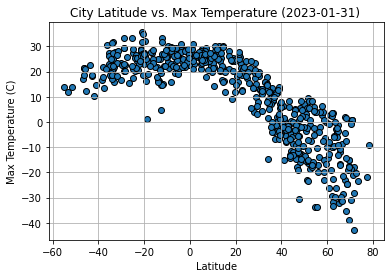

In [8]:
#build scatter plot
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity

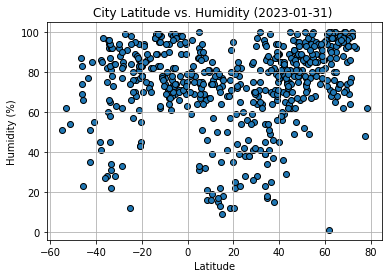

In [9]:
#build scatter plot
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Humidity (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness

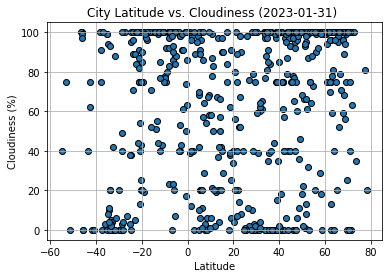

In [10]:
#build scatter plot
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed

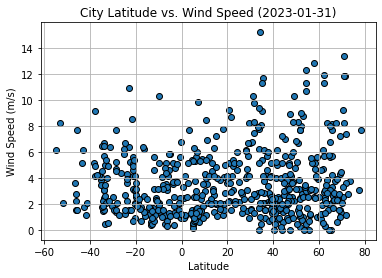

In [11]:
#build scatter plot
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")

plt.xlabel("Latitude")
#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression for Each Relationship

In [12]:
#define a function to create Linear Regression plots
def regression_plots(x_values,y_values,title, y_label, line_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
#create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,torbay,47.6666,-52.7314,0.88,95,100,5.66,CA,1675223504
3,maine-soroa,13.2114,12.0241,20.13,15,97,4.56,NE,1675223504
4,hoyanger,61.2204,6.0749,2.90,99,100,1.92,NO,1675223505
7,olafsvik,64.8945,-23.7142,-1.12,87,100,6.81,IS,1675223506
10,albany,42.6001,-73.9662,-6.47,65,97,1.56,US,1675223507


In [14]:
#create a DataFrame with the Southern Hemisphere data (Latitude > 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,13.81,51,40,6.17,AR,1675223421
1,byron bay,-28.6500,153.6167,29.41,77,40,4.67,AU,1675223272
5,bambous virieux,-20.3428,57.7575,27.34,83,75,3.09,MU,1675223505
6,hermanus,-34.4187,19.2345,18.22,92,3,1.46,ZA,1675223506
8,mataura,-46.1927,168.8643,21.32,74,100,1.51,NZ,1675223506


## Temperature vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: -0.8575200163899865


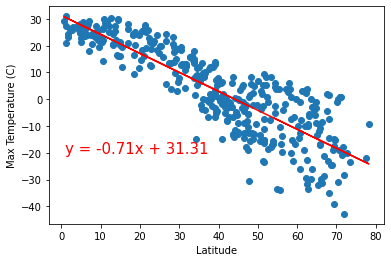

In [15]:
#linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Northern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (1,-20))

The r-value is: 0.3332663962682168


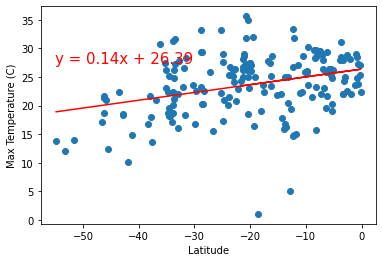

In [16]:
#linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Southern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (-55, 27.5))

### Insights: Temperature vs. Latitude
- The linear plots show that there is correlation between temperature and distance from the equator. In both hemispheres, the farther a city is from the equator, the colder the temperature is. City temperatures increase as they approach the equator.

## Humidity vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.4087484208983709


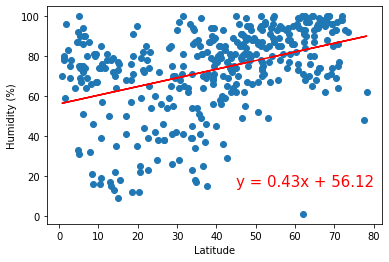

In [17]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regression_plots(x_values,y_values,"Northern Hemisphere: Humidity vs. Latitude Linear Regression", 
                 "Humidity (%)", (45,15))

The r-value is: 0.3003722820784565


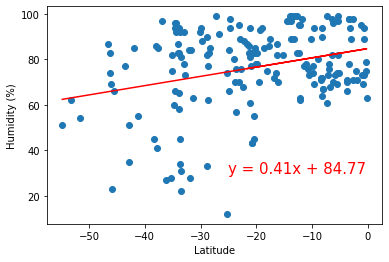

In [18]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regression_plots(x_values,y_values,"Southern Hemisphere: Humidity vs. Latitude Linear Regression", 
                 "Humidity (%)", (-25, 30))

### Insights: Humidity vs. Latitude
- There is a positve, although weak, correlation between humidity and latitude. Humidity increases as cities approach the equator in the southern hemisphere, and it also increases the farther the cities are from the equator in the northern hemisphere. Overall, lower latitudes are less humid than the higher latitudes. 

## Cloudiness vs . Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.28822207671189226


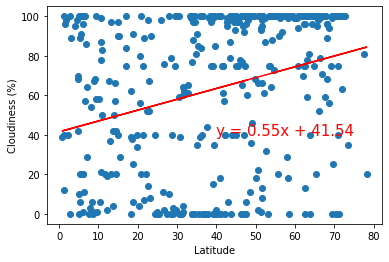

In [19]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regression_plots(x_values,y_values,"Northern Hemisphere: Cloudiness vs. Latitude Linear Regression", 
                 "Cloudiness (%)", (40,40))

The r-value is: 0.4228342974523665


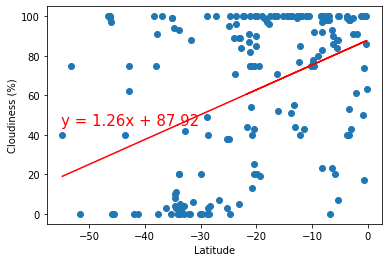

In [20]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regression_plots(x_values,y_values,"Southern Hemisphere: Cloudiness vs. Latitude Linear Regression", 
                 "Cloudiness (%)", (-55, 45))

### Insights: Cloudiness vs. Latitude
- There is no correlation between cloudiness and latitude. Cities vary on cloudiness percentage no matter their location. 

## Wind Speed vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.08880474237740948


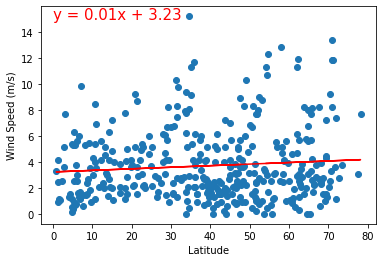

In [21]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regression_plots(x_values,y_values,"Northern Hemisphere: Wind Speed vs. Latitude Linear Regression", 
                 "Wind Speed (m/s)", (0,15))

The r-value is: -0.21904300049231548


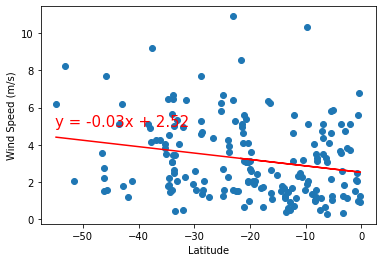

In [22]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regression_plots(x_values,y_values,"Southern Hemisphere: Wind Speed vs. Latitude Linear Regression", 
                 "Wind Speed (m/s)", (-55, 5))

### Insights: Wind Speed vs. Latitude
- In the southern hemisphere, the wind speed slows down as citites approach the equator. Although, there is no pattern of wind speed and latitude in the northern hemisphere. Overall, there is little to no correlation between wind speeds and latitude.